In [53]:
import numpy as np
import librosa
import os
from scipy.io import wavfile

# Load the audio file
audio_file = "p232_001.wav"
y, sr = librosa.load(audio_file)

# Calculate the number of chunks
chunk_size = 16384
num_chunks = len(y) // chunk_size

# Create a directory to store the chunks
output_dir = "audio_chunks"
os.makedirs(output_dir, exist_ok=True)

# Split the audio into chunks
for i in range(num_chunks):
    chunk = y[i * chunk_size : (i + 1) * chunk_size]
    output_file = os.path.join(output_dir, f"chunk_{i}.wav")
    wavfile.write(output_file,sr,chunk.astype(np.float32))


16384 [-0.34964663 -0.32867217 -0.3162535  ...  0.14685911  0.14492996
  0.14318132]
(16384,) [ 0.88755     0.894794    0.22926527 ...  0.34197002 -0.00190869
 -0.29845213]
(16384,) [-0.34964663 -0.32867217 -0.31625351 ...  0.14685911  0.14492996
  0.14318132]


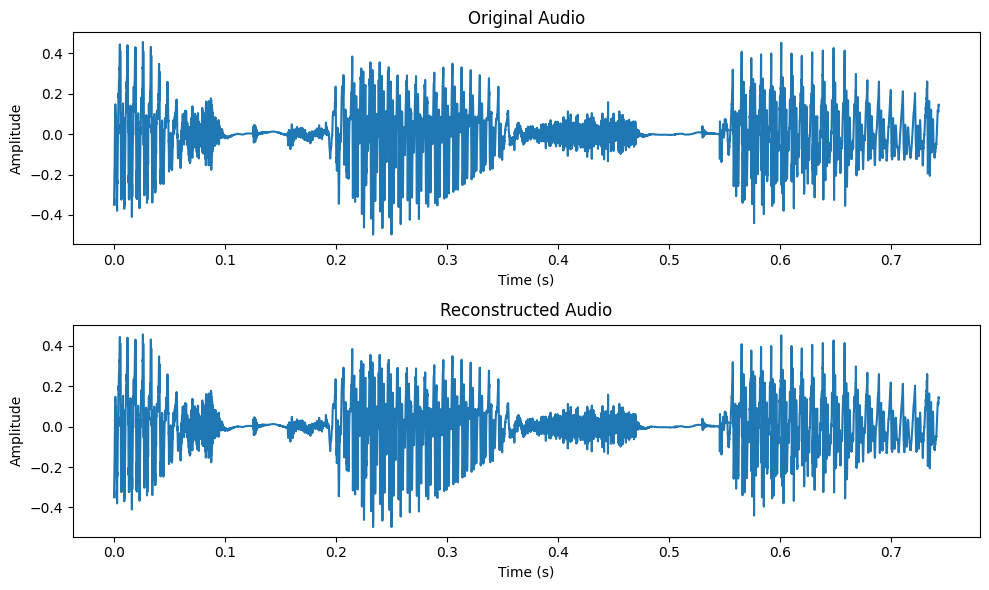

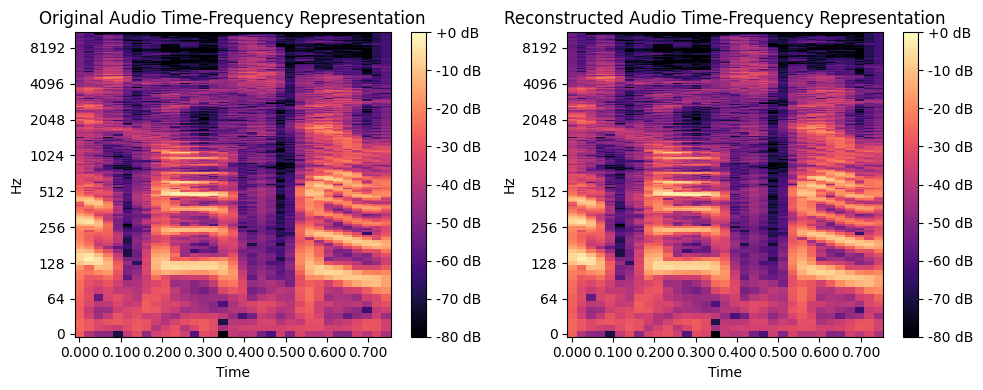

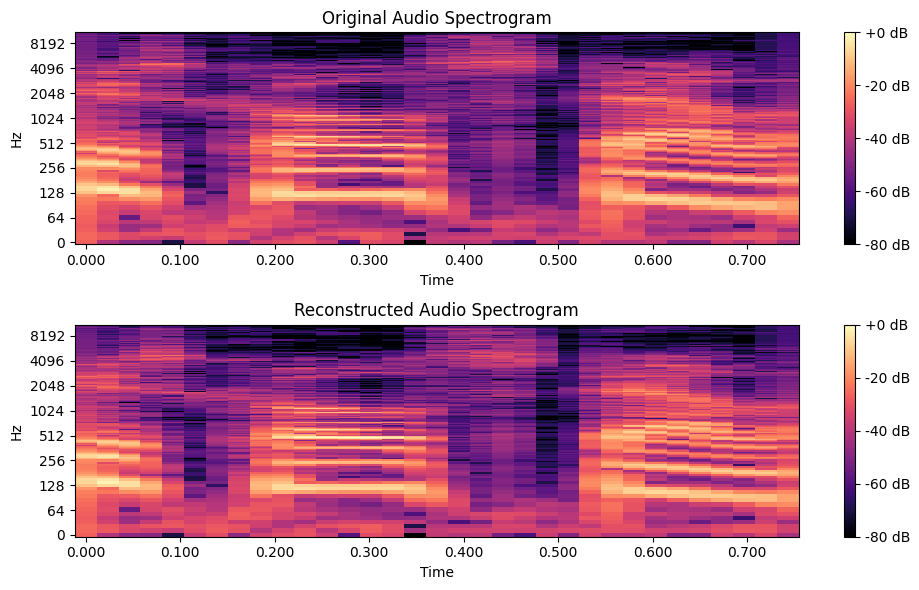

In [54]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
# from mdct import mdct
# from imdct import imdct
from mdctn import mdct, imdct
from scipy.io import wavfile

# Load the audio file
audio_file = "audio_chunks/chunk_1.wav"
y, sr = librosa.load(audio_file)
print(y.size,y)
# N = y.size/2
# Zero-pad the input audio to a length that is a multiple of half the window length

mdct_audio = mdct(y)

# mdct_audio = mdct(y)
print(mdct_audio.shape,mdct_audio)

# # Define MDCT parameters
# n_fft = 1024
# hop_length = n_fft // 2

# # Apply MDCT
# D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
# D_mdct = np.real(D * np.exp(1j * np.pi / (2 * n_fft) * (np.arange(2 * D.shape[0]) + 0.5)))

# Apply inverse MDCT
y_reconstructed = imdct(mdct_audio)
print(y_reconstructed.shape,y_reconstructed)

# Save the reconstructed audio
wavfile.write('reconstructed_audio_librosa.wav',sr,y_reconstructed.astype(np.float32))

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y_reconstructed)) / sr, y_reconstructed)
plt.title('Reconstructed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the time-frequency representation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Time-Frequency Representation')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y_reconstructed)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed Audio Time-Frequency Representation')

plt.tight_layout()
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y_reconstructed)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed Audio Spectrogram')

plt.tight_layout()
plt.show()

In [34]:
import numpy as np
from mdctn import mdct, imdct

x = np.arange(24)
print(x)

y =  mdct(x, N=16)
print(y)
z = imdct(y, N=16)
print(z)

np.allclose(x, z) # True

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[-108.          -51.32837776    6.30864406   12.15273375    0.
   -9.42197911    0.44834153    7.54552904 -172.          -92.33502493
    6.30864406   26.55235332    0.          -19.0434973     0.44834153
   15.70225831  -44.          -10.3217306     6.30864406   -2.24688582
    0.            0.19953908    0.44834153   -0.61120022]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


True